In [1]:
import cv2
import numpy as np

# 이미지 파일 경로
image_path = "img.jpg"

# EAST 모델 가중치 파일 경로
east_model_path = "frozen_east_text_detection.pb"

# 텍스트 감지를 위한 입력 크기 설정 (높이, 너비)
input_width = 320
input_height = 320

# 최소 신뢰도 설정
conf_threshold = 0.5

# NMS (Non-Maximum Suppression) 임계값 설정
nms_threshold = 0.4

# 이미지 로드
image = cv2.imread(image_path)
orig = image.copy()
(H, W) = image.shape[:2]

# 블롭(Blob)으로 변환: 이미지 데이터를 네트워크 입력에 맞게 전처리
blob = cv2.dnn.blobFromImage(image, 1.0, (input_width, input_height),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)

# EAST 모델 로드
net = cv2.dnn.readNet(east_model_path)

# 입력을 네트워크에 설정
net.setInput(blob)

# 네트워크의 출력 레이어 정의
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",  # 텍스트 확률 지도
    "feature_fusion/concat_3"         # 텍스트 경계 박스 좌표
]

# 모델 추론
(scores, geometry) = net.forward(layer_names)

# 텍스트 상자 계산 함수
def decode_predictions(scores, geometry, conf_threshold):
    (num_rows, num_cols) = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        scores_data = scores[0, 0, y]
        x0_data = geometry[0, 0, y]
        x1_data = geometry[0, 1, y]
        x2_data = geometry[0, 2, y]
        x3_data = geometry[0, 3, y]
        angles_data = geometry[0, 4, y]

        for x in range(num_cols):
            if scores_data[x] < conf_threshold:
                continue

            angle = angles_data[x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            end_x = int(x * 4.0 + (cos * x1_data[x]) + (sin * x2_data[x]))
            end_y = int(y * 4.0 - (sin * x1_data[x]) + (cos * x2_data[x]))
            start_x = int(end_x - w)
            start_y = int(end_y - h)

            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(scores_data[x])

    return (boxes, confidences)

# 감지된 텍스트 상자 및 신뢰도 값 계산
(boxes, confidences) = decode_predictions(scores, geometry, conf_threshold)

# NMS (Non-Maximum Suppression)를 통해 겹치는 박스 제거
# indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, conf_threshold, nms_threshold)
# cv2.dnn.NMSBoxesRotated 대신 cv2.dnn.NMSBoxes를 사용하고, 텍스트 상자의 형태를 x, y, width, height 형식으로 변환해야 합니다.
indices = cv2.dnn.NMSBoxes(x, y, width, height)

# 텍스트 상자 그리기
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = boxes[i]
        
        # 텍스트 영역 그리기
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# 결과 출력
cv2.imshow("Text Detection", orig)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: Can't parse 'bboxes'. Sequence item with index 0 has a wrong type

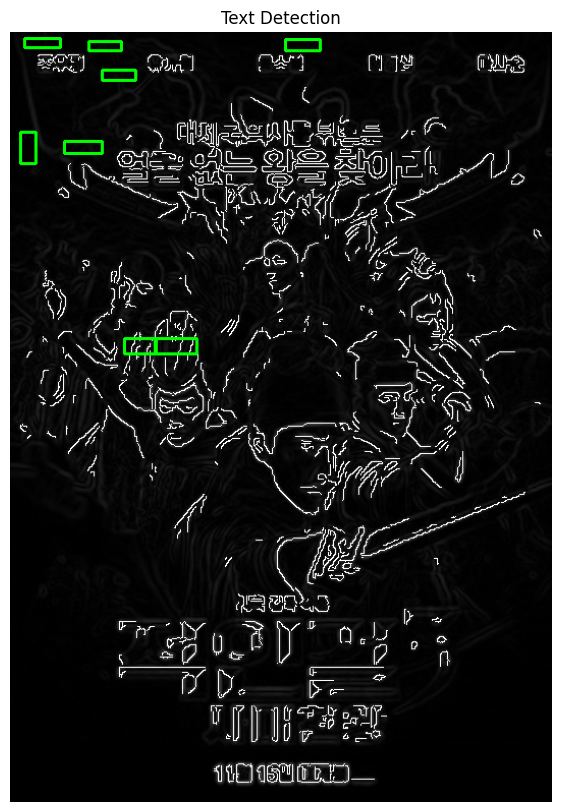

In [8]:
import cv2
import numpy as np

# 이미지 파일 경로
image_path = r'C:\ex\prj_poster\title_detect_img\combined_edges.jpg'

# EAST 모델 가중치 파일 경로
east_model_path = "frozen_east_text_detection.pb"

# 텍스트 감지를 위한 입력 크기 설정 (높이, 너비)
input_width = 320
input_height = 320

# 최소 신뢰도 설정
conf_threshold = 0.5

# NMS (Non-Maximum Suppression) 임계값 설정
nms_threshold = 0.4

# 이미지 로드
image = cv2.imread(image_path)
orig = image.copy()
(H, W) = image.shape[:2]

# 블롭(Blob)으로 변환: 이미지 데이터를 네트워크 입력에 맞게 전처리
blob = cv2.dnn.blobFromImage(image, 1.0, (input_width, input_height),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)

# EAST 모델 로드
net = cv2.dnn.readNet(east_model_path)

# 입력을 네트워크에 설정
net.setInput(blob)

# 네트워크의 출력 레이어 정의
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",  # 텍스트 확률 지도
    "feature_fusion/concat_3"         # 텍스트 경계 박스 좌표
]

# 모델 추론
(scores, geometry) = net.forward(layer_names)

# 텍스트 상자 계산 함수
def decode_predictions(scores, geometry, conf_threshold):
    (num_rows, num_cols) = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        scores_data = scores[0, 0, y]
        x0_data = geometry[0, 0, y]
        x1_data = geometry[0, 1, y]
        x2_data = geometry[0, 2, y]
        x3_data = geometry[0, 3, y]
        angles_data = geometry[0, 4, y]

        for x in range(num_cols):
            if scores_data[x] < conf_threshold:
                continue

            angle = angles_data[x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            end_x = int(x * 4.0 + (cos * x1_data[x]) + (sin * x2_data[x]))
            end_y = int(y * 4.0 - (sin * x1_data[x]) + (cos * x2_data[x]))
            start_x = int(end_x - w)
            start_y = int(end_y - h)

            # 상자 형식을 (start_x, start_y, width, height)로 변환
            boxes.append([start_x, start_y, int(w), int(h)])
            confidences.append(float(scores_data[x]))

    return (boxes, confidences)

# 감지된 텍스트 상자 및 신뢰도 값 계산
(boxes, confidences) = decode_predictions(scores, geometry, conf_threshold)

# NMS (Non-Maximum Suppression)를 통해 겹치는 박스 제거
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# 텍스트 상자 그리기
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, w, h) = boxes[i]
        
        # 텍스트 영역 그리기
        end_x = start_x + w
        end_y = start_y + h
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# 결과 출력
# cv2.imshow("Text Detection", orig)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

import matplotlib.pyplot as plt
# 결과 출력 (matplotlib 사용)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title("Text Detection")
plt.axis("off")
plt.show()